<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/math/Discrete_Random_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이산 확률 변수




## 1. 1차원 이산형 확률변수 정의

### 확률변수를 이해하려면 필요한 것은?

- 통계분석을 위한 기초 수학
- Python 라이브러리를 활용한 데이터 분석


In [3]:
# 라이브러리 세팅 : Numpy, Matplotlib 활용

import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 이산형 VS 연속형
- 이산형
  - 셀 수 있는 데이터
- 연속형
  - 값들 사이에도 무수히 많은 값들이 존재가능한 데이터 (셀수없음)

### 확률변수
- 변수가 취할 수 있는 값과 그 값이 나오는 확률에 의해 정의 된다

### 이산형 확률변수 VS 연속형 확률변수
- 이산형 확률변수
  - 확률변수로 취할 수 있는 값들이 셀 수 있는 데이터일 때 
- 연속형 확률변수
  - 확률변수로 취할 수 있는 값들이 셀 수 없는 데이터일 때

### 개념 1. 확률질량함수 (Probability Mass Function)
- 확률변수 X가 취할 수 있는 값에 대한 집합을  {$ 𝑥_1,𝑥_2,...$} 으로 가정하면, 확률변수 $X$가 $𝑥_k$라는 값을 취할 확률은
$$ P(𝑋=𝑥_k) = 𝑝_k \space (𝑘=1,2,...) $$
로 정의된다.

- 확률은 변수가 취할 수 있는 값 𝑥를 인수로 하는 함수이므로,
$$ f(x) = P(𝑋=𝑥) $$
로 표현할 수 있고, 이를 확률질량함수, 또는 확률함수라고 한다

- 예시 : 불공정한 주사위  
  
  ![스크린샷 2022-12-22 오전 12 53 59](https://user-images.githubusercontent.com/96982072/208947183-c3bd0fa0-c52b-47f0-be35-f10ac03ede5c.png)

  - $ 𝑝_1 = P(𝑋=1) = {1\over 21}, 𝑝_2 = P(𝑋=2) = {2 \over 21}, ... $ 로도 정의가 가능하지만, 
  - 확률질량함수로 표현시 아래와 같이 손쉽게 정의 가능하다  
    ![스크린샷 2022-12-26 오후 11 47 59](https://user-images.githubusercontent.com/96982072/209560530-a8255c44-5e0d-4140-b76a-94e42a122cfe.png)
  



  








In [4]:
# [Python] 확률질량함수 표현

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
      
X = [x_set, f]

# 확률질량함수 기반 P(x=k) 계산

prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식(dictionary type)으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

### 확률의 성질
- 확률은 2가지 식을 만족하여야 한다
  - 확률이 절대적으로 0이상이어야 한다 $$ f(𝑥_k) ≥ 0$$
  - 모든 확률을 더하면 1이 되어야 한다 $$ \sum_{k}f(𝑥_k) = 1 $$
- 확률이 모두 0이상인지는 모든 요소가 참일 때만 참을 반환하는 `np.all` 함수로 확인이 가능하다




In [5]:
np.all(prob >= 0)

True

In [6]:
np.sum(prob)

0.9999999999999999

### 누적분포함수 (Cumulative Distribution Function: CDF)
- 확률함수는 𝑃(𝑋 = 𝑥)로 표현이 되지만,  
누적분포함수는 𝑃(𝑋 ≤ 𝑥)로 표현이 된다
- 즉, 확률변수 X가 x이하가 될 때의 확률을 반환하는 함수이다
- 확률함수는 소문자인 𝑓(𝑥)로 표현이 되고,  
누적분포함수는 대문자인 𝐹(𝑥)로 표현이 된다

$$ F(x) =  𝑃(𝑋 ≤ 𝑥) = \sum_{x_k ≤ 𝑥}f(x_k) $$


In [7]:
# 누적분포함수 표현

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [8]:
F(3)

0.2857142857142857

### 확률변수의 변환
- 확률변수의 X에 2를 곱하고 3을 더한 2X+3과 같은 연산을 하는 것
- 2X+3으로 변환이 되어도,  
확률변수의 X가 취할 수 있는 값들만이 변환될 뿐,
그에 따른 확률값은 그대로 유지되어 2X+3 또한 확률변수가 된다


In [9]:
# 2X+3으로 변환된 확률변수 Y 계산

y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

## 2. 1차원 이산형 확률변수 지표


### 1차원 이산형 확률변수의 지표
- Chapter 2에서 배웠던 1차원 데이터의 지표인 평균과 분산을,
동일하게 1차원 확률변수에도 정의 가능하다
  - 평균(Mean/Average) -> 기대값(Expectation) 
  - 분산(Variance) -> 분산(Variance)


### 기대값 (Expectation, Expected Value)
- 확률변수의 평균
- 이상적인 기대값 계산 방법
  - 확률변수를 무제한으로 시행하여 얻어진 실현값의 평균
- 이산형 확률변수의 평균(기대값)
  - 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의

  $$ E(X) = \sum_{k}x_k f(x_k)$$

- 기대값이 기호로 표현될 때는, 𝜇(뮤)나 𝐸(𝑋)라는 표기를 주로 사용한다



### 기대값 (Expectation, Expected Value)
  - [Python] 불공정한 주사위의 기대값 계산

In [10]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

- 이상적인 기대값 계산 방법인, 무제한 시행을 통해서 얻은 실현값의 평균으로 계산  
(단,무제한 시행 대신 100만 번 주사위를 굴림)


In [11]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.331707

- 정의한 기대값 계산 결과값과 이상적인 계산을 어림잡아 계산한 기대값이 거의 비슷

### 2X+3으로 변환한 확률변수 Y의 기대값

- 기대값은 $𝑥_k$라는 값을 그대로 $2𝑥_k+3$으로 치환한 다음 식으로 정의한다

$$ 𝐸(𝑌) =𝐸(2𝑋+3) = \sum_{k}(2𝑥_k+3)𝑓(𝑥_k) $$

-  더 일반화하면, 확률 변수 X가 변환된 함수 g(X)의 기대값은 다음 식으로 정의된다

$$ 𝐸(𝑔(𝑋)) = \sum_{k}𝑔(𝑥_k)𝑓(𝑥_k) $$


### [Python]변환된 확률변수 g(X)의 기대값

- g(X) = X일 때

In [12]:


def E(X, g=lambda x: x):
    x_set, f= X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])


In [13]:
E(X)

4.333333333333333

- g(X) = 2X+3일 때

In [14]:
E(X, g=lambda x: 2*x+3)

11.666666666666664

### 기대값의 선형성
- 𝑎, 𝑏를 실수, 𝑋를 확률변수라 하면,
$$ 𝐸(𝑎𝑋 + 𝑏) = 𝑎𝐸(𝑋) + 𝑏 $$ 
- [Python] 비교 결과 
  $𝐸(2𝑋+3) = 2𝐸(𝑋) + 3$

In [15]:
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [16]:
2*E(X)+3

11.666666666666666

### 분산 (Variance)
- 편차 제곱의 기대값으로 정의된다
$$ V(𝑋) = \sum_k(𝑥_k−𝜇)^2𝑓(𝑥_k)$$
  - 𝜇는 확률변수 X의 기대값으로 𝐸(𝑋)이다.

- 분산은 기호로 𝜎(시그마)를 사용하고, $𝜎^2$이나 𝑉(𝑋)로 흔히 표기한다
- 𝜎는 확률변수 X의 표준편차를 나타낸다

### 분산
- [Python] 불공정한 주사위의 분산 계산

In [17]:
mean = E(X)
np.sum([(x_k-mean)**2*f(x_k) for x_k in x_set])

2.2222222222222223

### 변환된 확률변수의 분산
- 2X+3으로 변환되었을 때
$$ V(2𝑋+3) = \sum_k((2𝑥_k + 3) − 𝐸(2𝑋+3))^2 𝑓(𝑥_k) $$
- g(X)로 변환되었을 때
$$ V(𝑔(𝑋)) = \sum_k (𝑔(𝑥_k) − 𝐸(𝑔(𝑋))^2 𝑓(𝑥_k) $$



### [Python] 변환된 확률변수의 분산 계산
  -  분산 계산함수 정의


In [18]:
def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

- g(X) = X일 때

In [19]:
V(X)

2.2222222222222223

- g(X) = 2X+3일 때

In [20]:
V(X, lambda x: 2*x+3)

8.88888888888889

### 분산의 선형성
- 𝑎, 𝑏를 실수, 𝑋를 확률변수라 하면,
$$ V(𝑎𝑋+𝑏) =𝑎^2 𝑉(𝑋) $$ 가 성립한다



- [Python]비교결과 : $ 𝑉(2𝑋+3) = 2^2 𝑉(𝑋) $

In [21]:
V(X, lambda x: 2*x+3)

8.88888888888889

In [22]:
2**2 * V(X)

8.88888888888889

## 3. 2차원 이산형 확률변수 정의

### 2차원 이산형 확률변수의 정의
- 2차원 확률변수에서는 1차원 확률분포 2개(X, Y)를 동시에 다룬다
- 각 확률변수가 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정의된다


### 결합확률분포 (Joint Probability Distribution)

- (X,Y)가 취할 수 있는 값의 조합으로 이루어진 집합을
$$ \left\{ (𝑥_i,𝑦_j) | 𝑖 = 1,2,...; 𝑗=1,2,... \right\} $$
라고 표현할 수 있으며, 각각 조합에 맞는 확률들은 다음과 같이 표현된다.
$$ 𝑃(𝑋=𝑥_i,𝑌=𝑦_i) = 𝑝_{ij}(𝑖=1,2,...;𝑗=1,2,...) $$
이와 같이 확률변수 (X, Y)의 움직임을 동시에 고려한 분포를 결합확률분포라 한다

### 결합확률분포 예시 1
- X는 불공정한 주사위 A와 B 2개의 눈을 더한것,Y는 불공정한 주사위 A의 눈으로 가정한다
- X가 취할 수 있는 값의 집합 = {2,3,4,5,6,7,8,9,10,11,12}
Y가 취할 수 있는 값의 집합 = {1,2,3,4,5,6}
- X=9,Y=4일때의확률은? A=4,B=5의 눈이 나올 
$$ {4 \over 21} \times {5 \over 21} = {20 \over 441} $$
이라고 계산할 수 있다

### 결합확률함수 (Joint Probability Function)
- $ 𝑃(𝑋=𝑥,𝑌=𝑦) = 𝑓_{XY}(𝑥,𝑦) $가 되는 함수 $ 𝑓_{xy}(𝑥,𝑦) $를 결합확률함수라 한다

### 결합확률함수 예시 

- 불공정 주사위 A,B기반 X=A+B,Y=A일 때
$$ f_{XY}(x,y) = \begin{cases}
\ y(x-y) \over 441 & (y \in \left\{1,2,3,4,5,6\right\} \mbox{및} \space x-y \in \left\{1,2,3,4,5,6\right\}) \\
\quad 0 & (\mbox{otherwise})
\end{cases} $$


### 2차원 이산형 확률변수

- 확률의 성질

 $$ f_{XY} (x_i,y_j) \ge 0 $$

 $$ \sum_i \sum_j f_{XY} (x_i,y_j) = 1$$

### [Python] 2차원 이산형 확률변수 예시

In [23]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [25]:
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y * (x-y) / 441
    else:
        return 0

In [26]:
XY = [x_set, y_set, f_XY]

In [27]:
prob = np.array(
    [
        [
            f_XY(x_i, y_j) 
            for y_j in y_set
        ]
        for x_i in x_set
    ]
)

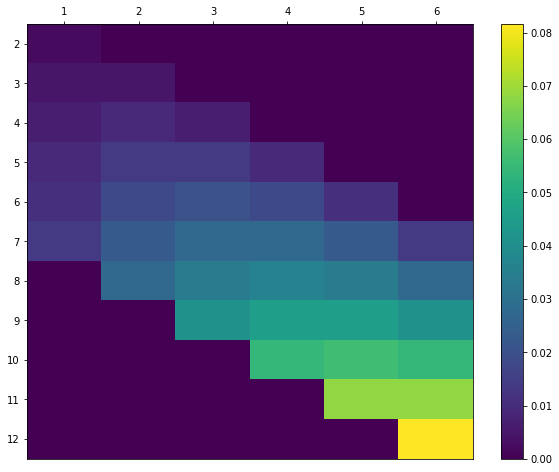

In [29]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(1, 1, 1)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

# y축을 내림차순의 숫자가 되도록 위 아래를 반전한다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

- 확률 분포 시각화 및 확률의 성질 확인

In [30]:
np.all(prob >= 0)

True

In [31]:
np.sum(prob)

1.0

### 주변확률분포 (Marginal Probability Distribution)
- 확률변수 (X, Y)가 결합확률분포에 의해 동시에 정의되었음에도 $ ( 𝑓_{XY}(x_i,y_j))$  
개별 확률변수 X의 확률분포 $(𝑓_X( 𝑥 ))$ 만을 다시 살펴보아야할 때 이를 주변확률분포라 한다
- 주변확률분포는 아래 식을 통해 계산된다
$$ f_X(x) = \sum_k f_{XY}(x,y_k) $$

### [Python] 주변확률분포 정의

In [32]:
def f_X(x):
    return np.sum(
        [
            f_XY(x, y_k) 
            for y_k in y_set
        ]
    )

In [33]:
def f_Y(y):
    return np.sum(
        [
            f_XY(x_k, y)
            for x_k in x_set
        ]
    )

In [34]:
X = [x_set, f_X]
Y = [y_set, f_Y]

### [Python] 주변확률분포 $𝒇_𝑿(𝒙) $ , $ 𝒇_𝒀(𝒚) $ 시각화 소스 코드

In [35]:
prob_x = np.array(
    [
        f_X(x_k) 
        for x_k in x_set
    ]
)
prob_y = np.array(
    [
        f_Y(y_k) 
        for y_k in y_set
    ]
)

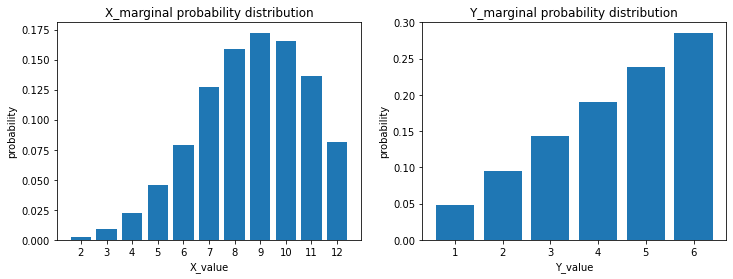

In [36]:
fig = plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

## 4. 2차원 이산형 확률변수 지표